In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving Df.csv to Df.csv


**Importing dataset containing audio files**

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
d= pd.read_csv('Df.csv')
d.head()

,Namaskar,Label
0,1 (2).wav,Namaskar1
1,1 (3).wav,Namaskar1
2,1 (4).wav,Namaskar1
3,1 (5).wav,Namaskar1
4,1 (6).wav,Namaskar1


In [7]:
audio='/content/gdrive/MyDrive/Namaskar'

In [10]:
import librosa
audio_file_path='/content/gdrive/MyDrive/Namaskar/1.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

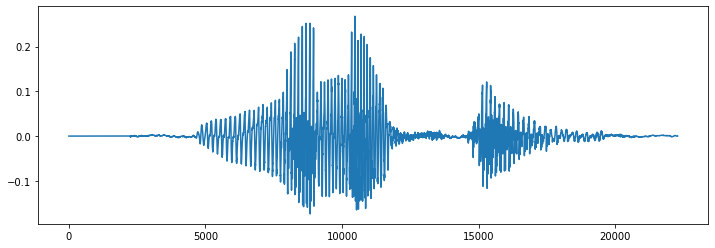

In [11]:
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [13]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=16000, n_mfcc=1)
print(mfccs.shape)

(1, 44)


In [15]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=16000, n_mfcc=1)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [17]:
import os
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(d.iterrows()):
    file_name = os.path.join(os.path.abspath(audio),str(row["Namaskar"]))
    final_class_labels=row["Label"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

51it [00:15,  3.19it/s]


In [21]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,[-310.7928],Namaskar1
1,[-418.392],Namaskar1
2,[-441.6914],Namaskar1
3,[-435.14105],Namaskar1
4,[-418.40036],Namaskar1


In [22]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [23]:
X.shape

(51, 1)

In [24]:
y=np.array(pd.get_dummies(y))

In [25]:

y.shape

(51, 7)

In [26]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [30]:
X_train.shape

(40, 1)

In [31]:
X_test.shape

(11, 1)

In [32]:
y_train.shape

(40, 7)

In [33]:
y_test.shape

(11, 7)

**MODEL CREATION**